In [2]:
from QIP import *

In [6]:
ghz_dict = {"0000":1/2**.5,"1111":1/2**.5}
ghz = QCircuit(4,initial_state=bitstrings_to_vector(ghz_dict),allow_empty_systems=False)
ghz.subsysem_analysis()
print("Average failure saturation of MMI inequality: "+str(ghz.mmi["avg_fail_saturation"]))

Average failure saturation of MMI inequality: [1.0]


In [7]:
print(ghz.mmi["percent_fail"])

[1.0]


Checking ingletons inequality for the W state on 6 qubits

In [1]:

n=6
W_state_dict = {}
for i in range(n):
    bitstring = "0"*n
    bitstring = bitstring[:i] + '1' + bitstring[i+1:]
    W_state_dict[bitstring] = 1/n**.5
W_state = QCircuit(6,initial_state=bitstrings_to_vector(W_state_dict))
W_state.subsysem_analysis()
print("W state: "+state_as_string(W_state_dict))
# prints an empty list if ingletons never fails
print("Average failure saturation of ingletons inequality: "+str(W_state.ing["avg_fail_saturation"]))

W state: 0.408|100000> + 0.408|010000> + 0.408|001000> + 0.408|000100> + 0.408|000010> + 0.408|000001>
Average failure saturation of ingletons inequality: []


Checking Ingleton on the state $\ket{\psi}=\frac{1}{4}(\ket{0000}+\ket{1111}+\ket{1010}+\ket{1001})$

In [8]:
state_dict = {}
state_dict['0000']=1/4
state_dict['1111']=1/4
state_dict['1010']=1/4
state_dict['1001']=1/4
ing_test = QCircuit(4,initial_state=bitstrings_to_vector(state_dict))
ing_test.subsysem_analysis()
print("Average failure saturation of ingletons inequality: "+str(ing_test.ing["avg_fail_saturation"]))

Average failure saturation of ingletons inequality: []


Checking Ingleton using $\rho=\frac{1}{2}\ket{\psi}\bra{\psi}+\frac{1}{4}\ket{1010}\bra{1010}+\frac{1}{4}\ket{1001}\bra{1001}$, where $\ket{\psi}=\frac{1}{\sqrt{2}}(\ket{0000}+\bra{1111})$

In [9]:
psi_dict = {}
psi_dict["0000"]=1/2**.5
psi_dict["1111"]=1/2**.5
psi_vec = bitstrings_to_vector(psi_dict)
psi_vec.shape=(2**4,1)
vec1 = bitstrings_to_vector("1010")
vec1.shape=(2**4,1)
vec2 = bitstrings_to_vector("1001")
vec2.shape=(2**4,1)
rho = 0.5*np.outer(psi_vec,psi_vec.conj())+0.25*np.outer(vec1,vec1.conj())+0.25*np.outer(vec2,vec2.conj())
#rho = np.outer(psi_vec.conj(),psi_vec)

ing_test = QCircuit(4,pure_state=False)
ing_test.density_matrix=rho
ing_test.subsysem_analysis()
print("Average failure saturation of ingletons inequality: "+str(ing_test.ing["avg_fail_saturation"]))

Average failure saturation of ingletons inequality: [0.12255624891826573]


In [10]:
def purify(rho):
    eigvals, eigvecs = np.linalg.eig(rho)
    dim = len(eigvecs)
    sum = 0.
    for i in range(dim):
        sum = sum + np.sqrt(eigvals[i])*np.kron(eigvecs[:,i],eigvecs[:,i])
    return sum

In [12]:
purified = np.outer(purify(rho),purify(rho).conj())

In [16]:
purified_circuit = QCircuit(8,initial_state=purify(rho),allow_empty_systems=True)
purified_circuit.subsysem_analysis()

In [17]:
print("Average failure saturation of ingletons inequality: "+str(purified_circuit.ing["avg_fail_saturation"]))
print("Fail ratio of ingletons inequality: "+str(purified_circuit.ing["percent_fail"]))

Average failure saturation of ingletons inequality: [0.06354720233997165]
Fail ratio of ingletons inequality: [0.0005554938340184424]


In [18]:
partial_trace(purified,[1])

array([[0.5+0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j]])

In [42]:
import qiskit.quantum_info as qi
hw_state = {}
hw_state["011010"] = 1/3**.5
hw_state["110011"] = 1j/3**.5
hw_state["111111"] = -1/3**.5
psi_vec = bitstrings_to_vector(hw_state)
rho = np.outer(psi_vec,psi_vec.conj())
a = qi.partial_trace(rho,[5,2]).data
a[a!=0]

array([0.33333333+0.j, 0.33333333+0.j, 0.33333333+0.j])

In [57]:
purify(rho)

array([ 0.35355339, -0.35355339,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.35355339,  0.35355339,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [71]:
purified_rho = np.outer(purify(rho),purify(rho).conj())
rho_test = qi.partial_trace(purified_rho,[4,5,6,7])
rho_test


DensityMatrix([[0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.25+0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j

Here I can see that under no permutation of tracing out 4 qubits does the reduced density matrix equal the original one

In [55]:
purified_rho = np.outer(purify(rho),purify(rho).conj())
for comb in combinations(range(8),4):
    rho_test = qi.partial_trace(purified_rho,list(comb))
    if np.allclose(rho_test,rho) == True:
        print(comb)

In [5]:
entropies_map = {}
subsystems = list(chain.from_iterable(n_partitioning(list(range(4)),2)))
subsystems.sort(key=len)
for subsystem in n_partitioning(list(range(4)),2):
    reduced_dm_A = partial_trace(rho,subsystem[1])
    reduced_dm_B = partial_trace(rho,subsystem[0])
    probs_A = np.linalg.eigvals(reduced_dm_A).tolist()
    probs_B = np.linalg.eigvals(reduced_dm_B).tolist()
    entropy_A = shannon_ent([p_i.real for p_i in probs_A])
    entropy_B = shannon_ent([p_i.real for p_i in probs_B])
    entropies_map[tuple(subsystem[0])] = entropy_A
    # S_A always = S_B if S_AB = 0 (S_AB is pure) so we dont waste time calculating it again
    entropies_map[tuple(subsystem[1])] = entropy_B

entropies_map


{(): -0.0,
 (0, 1, 2, 3): 1.039720770839918,
 (0,): 0.5623351446188083,
 (1, 2, 3): 1.3862943611198906,
 (1,): 0.5623351446188083,
 (0, 2, 3): 1.3862943611198906,
 (2,): 0.6931471805599453,
 (0, 1, 3): 1.3862943611198906,
 (3,): 0.6931471805599453,
 (0, 1, 2): 1.3862943611198906,
 (0, 1): 1.0397207708399179,
 (2, 3): 1.3862943611198906,
 (0, 2): 1.0397207708399179,
 (1, 3): 1.0397207708399179,
 (0, 3): 1.0397207708399179,
 (1, 2): 1.0397207708399179}

In [6]:
mutual_conditional([0],[1],[2],entropies_map)

-1.1102230246251565e-16

In [7]:
mutual_conditional([0],[1],[3],entropies_map)

-1.1102230246251565e-16

In [8]:
mutual([2],[3],entropies_map)

0.0

In [9]:
mutual([0],[1],entropies_map)

0.08494951839769871

In [19]:
def qr_haar(N):
    """Generate a Haar-random matrix using the QR decomposition."""
    # Step 1
    A, B = np.random.normal(size=(N, N)), np.random.normal(size=(N, N))
    Z = A + 1j * B

    # Step 2
    Q, R = np.linalg.qr(Z)

    # Step 3
    Lambda = np.diag([R[i, i] / np.abs(R[i, i]) for i in range(N)])

    # Step 4
    return np.dot(Q, Lambda)

print(qr_haar(2**3))

[[-3.74824182e-01-0.24193361j -3.27542664e-02-0.44739875j
  -8.98798774e-02+0.16255748j -3.07592062e-01-0.11782907j
  -4.75704677e-01-0.01273501j  2.83504209e-01-0.2465539j
   2.20893608e-01-0.0124386j  -1.45339638e-01+0.13799886j]
 [-2.60461349e-01+0.16982538j -4.31386278e-01-0.16516057j
  -2.43918840e-02-0.01476192j  2.09415866e-01-0.46830063j
  -1.18076399e-01-0.06845224j  3.20646271e-03+0.20195888j
  -5.21423674e-01+0.28124138j  1.04458556e-01-0.06824489j]
 [ 1.33755568e-03-0.3254489j  -2.80547808e-01-0.26857279j
   1.20985682e-01+0.0270789j  -1.32656397e-01+0.00855111j
   2.64298273e-01+0.14089232j -2.39795162e-02+0.11392619j
   2.18167386e-01-0.04283154j  1.89645933e-01-0.72218115j]
 [-2.46428894e-01+0.04623009j  1.28637984e-01+0.1678286j
   2.77643141e-01+0.23891401j -2.40478803e-01+0.31520825j
  -3.75136704e-01-0.25448384j -1.54468411e-01+0.56714799j
  -4.71892532e-02-0.02675694j  2.00744800e-01-0.08259151j]
 [ 3.47621814e-04+0.26292272j -3.91738312e-02-0.03378687j
  -8.3790505

In [20]:
state_as_string(qr_haar(2**3)@bitstrings_to_vector("000"))


'(-0.025+0.103j)|000> + (0.121+0.183j)|001> + (-0.18+0.316j)|010> + (-0.168-0.491j)|011> + (0.342+0.213j)|100> + (0.151-0.502j)|101> + (0.259+0.183j)|110> + (-0.021-0.031j)|111>'

In [31]:
num_qubits = 8
num_gates = 10
rand_circuit = QCircuit(num_qubits)
for i in range(num_gates):
    U = qr_haar(2**num_qubits)
    rand_circuit.apply_to_circuit(U)
    rand_circuit.subsysem_analysis()


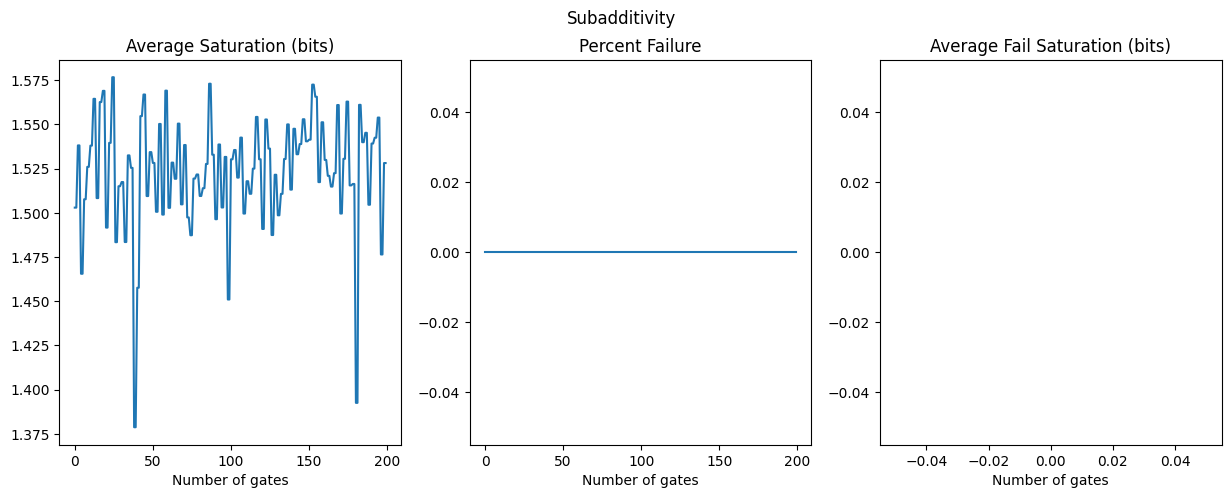

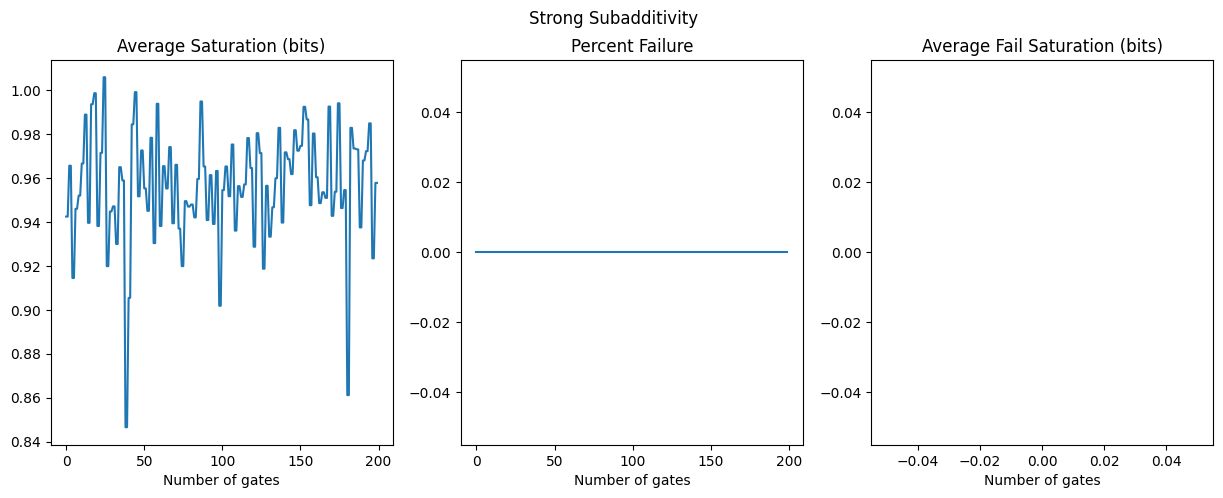

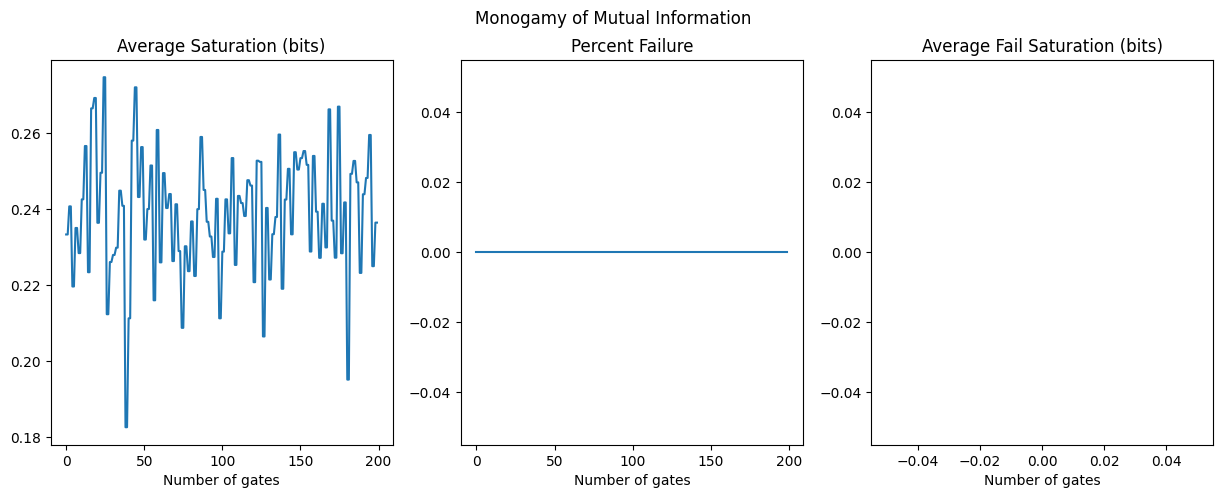

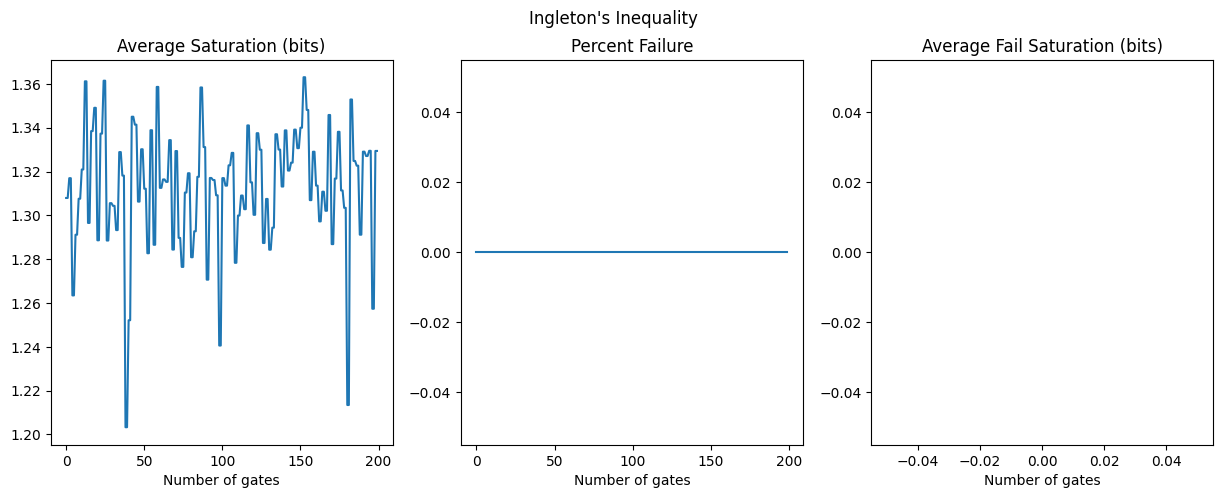

In [30]:
rand_circuit.plot_saturations()